# Dipole - Comparing to Bmad

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pmd_beamphysics import single_particle
from pmd_beamphysics.units import mec2
from pytao import Tao

import impact.z as IZ
from impact.tests.z.conftest import bmad_files
from impact.z.interfaces.bmad import export_particles as tao_export_particles

In [2]:
reference_particle_mass = mec2
energy = 10e6
gamma = energy / mec2
sigma_x0 = 0.001
norm_emit_x = 1e-12
norm_emit_y = 1e-12
beta_x = sigma_x0**2 * gamma / norm_emit_x
beta_y = beta_x

pz = np.sqrt(energy**2 - mec2**2)

# Should give beta_x = 19569511.835591838 m
x0 = 0.1
y0 = 0.01
pz0 = pz * 0.99
P0 = single_particle(x=x0, y=y0, pz=pz0)

In [3]:
!cat $bmad_files/dipole.bmad

! Lattice file adapted from simple.bmad
no_digested
beginning[beta_a] = 10.   ! m  a-mode beta function
beginning[beta_b] = 10.   ! m  b-mode beta function
beginning[e_tot] = 10e6   ! eV   Or can set beginning[p0c]

parameter[geometry] = open          ! Or closed
parameter[particle] = electron      ! Reference particle.

sbend1: sbend, l = 0.6, angle = 30 * pi/180, fringe_type=full

lat: line = (sbend1)
use, lat


In [4]:
tao = Tao(lattice_file=bmad_files / "dipole.bmad", plot="mpl")

In [5]:
P0.write("dipole_initial_particles.h5")
for cmd in [
    "set beam_init position_file = dipole_initial_particles.h5",
    f"set beam_init n_particle = {len(P0)}",
    f"set beam_init bunch_charge = {P0.charge}",
    "set beam_init saved_at = *",
    "set global track_type = single",
    "set global track_type = beam",
]:
    res = tao.cmd(cmd)
    if res:
        print("\n".join(res))

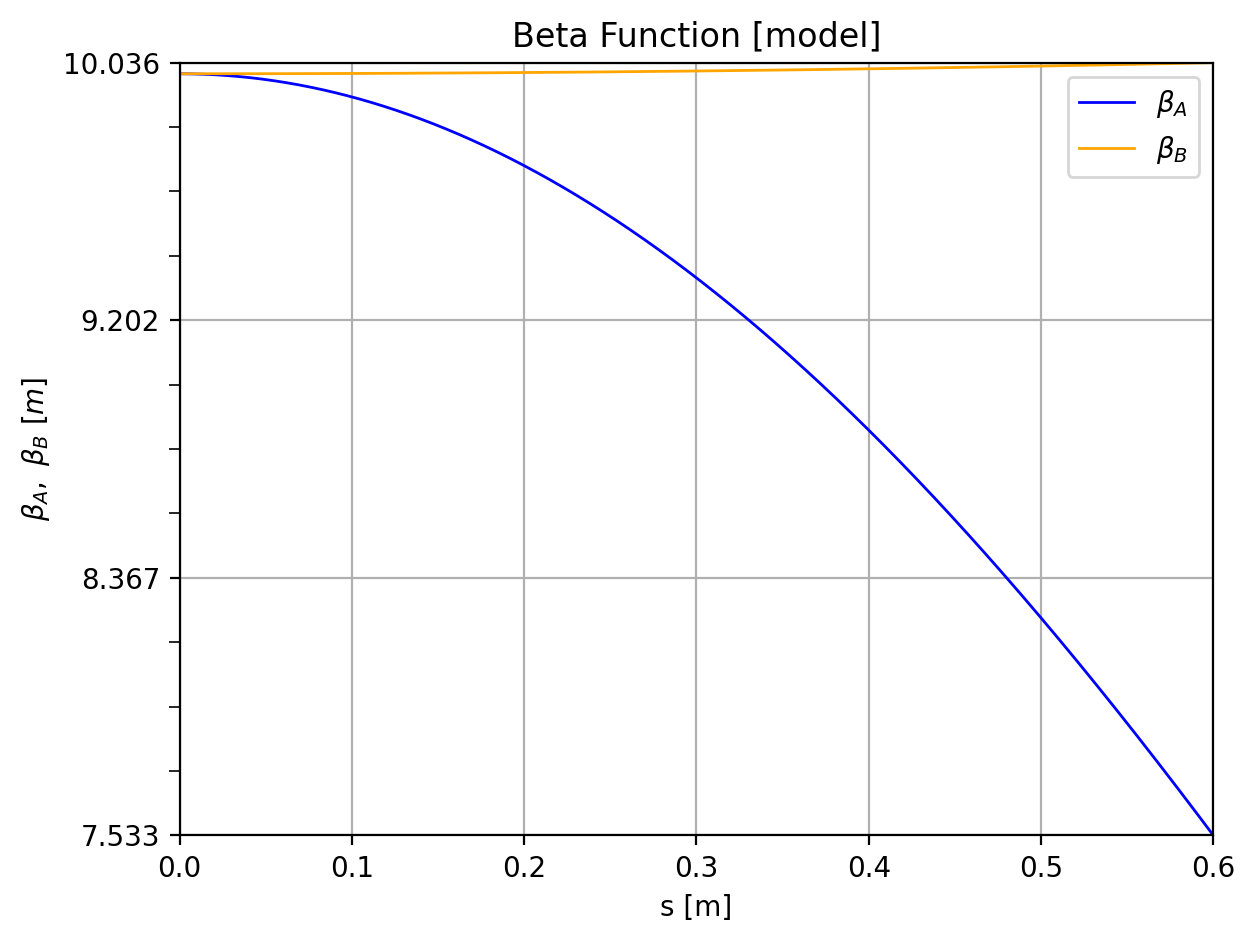

In [6]:
tao.plot("beta", include_layout=False)

In [7]:
I = IZ.ImpactZ.from_tao(
    tao, use_temp_dir=False, workdir="./dipole-bmad", initial_particles=P0
)

In [8]:
I.input.dipole

Dipole(
    name='SBEND1',
    metadata={'bmad_id': 1},
    length=0.6,
    steps=34,
    map_steps=34,
    type_id=4,
    angle=0.523598775598299,
    k1=0.0,
    input_switch=0.0,
    hgap=0.0,
    e1=0.0,
    e2=0.0,
    entrance_curvature=0.0,
    exit_curvature=0.0,
    fint=0.0,
    misalignment_error_x=0.0,
    misalignment_error_y=0.0,
    rotation_error_x=0.0,
    rotation_error_y=0.0,
    rotation_error_z=0.0
)

In [9]:
output = I.run()

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/4 [00:00<?, ?it/s]

/Users/klauer/Repos/lume-impact/impact/z/output.py:157: RuntimeWarning: invalid value encountered in divide
  stats["sigma_x"] ** 2 * stats["mean_gamma"] / stats["norm_emit_x"]
/Users/klauer/Repos/lume-impact/impact/z/output.py:160: RuntimeWarning: invalid value encountered in divide
  stats["sigma_y"] ** 2 * stats["mean_gamma"] / stats["norm_emit_y"]


In [10]:
I.input

ImpactZInput(
    initial_particles=<ParticleGroup with 1 particles at 0x16a700f80>,
    ncpu_y=1,
    ncpu_z=1,
    gpu=IZ.GPUFlag.disabled,
    seed=-1,
    n_particle=1,
    integrator_type=IZ.IntegratorType.linear_map,
    err=1,
    diagnostic_type=IZ.DiagnosticType.extended,
    nx=64,
    ny=64,
    nz=64,
    boundary_type=IZ.BoundaryType.trans_open_longi_open,
    radius_x=0.0,
    radius_y=0.0,
    z_period_size=0.0,
    distribution=IZ.DistributionType.read,
    restart=0,
    subcycle=0,
    nbunch=0,
    particle_list=[0],
    current_list=[0.0],
    charge_over_mass_list=[0.0],
    twiss_alpha_x=0.0,
    twiss_beta_x=10.0,
    twiss_norm_emit_x=1e-06,
    twiss_mismatch_x=1.0,
    twiss_mismatch_px=1.0,
    twiss_offset_x=0.0,
    twiss_offset_px=0.0,
    twiss_alpha_y=0.0,
    twiss_beta_y=10.0,
    twiss_norm_emit_y=1e-06,
    twiss_mismatch_y=1.0,
    twiss_mismatch_py=1.0,
    twiss_offset_y=0.0,
    twiss_offset_py=0.0,
    twiss_alpha_z=0.0,
    twiss_beta_z=1.0,
    twiss_norm_emit_z=1e-06,
    twiss_mismatch_z=1.0,
    twiss_mismatch_e_z=1.0,
    twiss_offset_phase_z=0.0,
    twiss_offset_energy_z=0.0,
    average_current=0.0,
    reference_kinetic_energy=9489001.05,
    reference_particle_mass=510998.94999999995,
    reference_particle_charge=-1.0,
    reference_frequency=1300000000.0,
    initial_phase_ref=0.0,
    lattice=[
        WriteFull(
            name='initial_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=100,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        ),
        Dipole(
            name='SBEND1',
            metadata={'bmad_id': 1},
            length=0.6,
            steps=34,
            map_steps=34,
            type_id=4,
            angle=0.523598775598299,
            k1=0.0,
            input_switch=0.0,
            hgap=0.0,
            e1=0.0,
            e2=0.0,
            entrance_curvature=0.0,
            exit_curvature=0.0,
            fint=0.0,
            misalignment_error_x=0.0,
            misalignment_error_y=0.0,
            rotation_error_x=0.0,
            rotation_error_y=0.0,
            rotation_error_z=0.0
        ),
        WriteFull(
            name='WRITE_END',
            metadata={'bmad_id': 2},
            length=0.0,
            steps=0,
            file_id=200,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        ),
        WriteFull(
            name='final_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=101,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        )
    ],
    filename=None,
    verbose=False
)

In [11]:
I.output

ImpactZOutput(
    run=RunInfo(
        error=False,
        error_reason='',
        run_script='/Users/klauer/Repos/IMPACT-Z/src/build/ImpactZexe',
        run_time=0.05530204204842448
    ),
    stats=OutputStats(
        beta_ref=array([0.998694, 0.998694, 0.998694, 0.998694, 0.998694, 0.998694,
       0.998694, 0.998694, 0.998694, 0.998694, 0.998694, 0.998694,
       0.998694, 0.998694, 0.998694, 0.998694, 0.998694, 0.998694,
       0.998694, 0.998694, 0.998694, 0.998694, 0.998694, 0.998694,
       0.998694, 0.998694, 0.998694, 0.998694, 0.998694, 0.998694,
       0.998694, 0.998694, 0.998694, 0.998694, 0.998694]),
        charge_state_n_particle=array([], dtype=float64),
        gamma_ref=array([19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695,
       19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695,
       19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695,
       19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695,
       19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695, 19.5695]),
        kinetic_energy_ref=array([9489000., 9489000., 9489000., 9489000., 9489000., 9489000.,
       9489000., 9489000., 9489000., 9489000., 9489000., 9489000.,
       9489000., 9489000., 9489000., 9489000., 9489000., 9489000.,
       9489000., 9489000., 9489000., 9489000., 9489000., 9489000.,
       9489000., 9489000., 9489000., 9489000., 9489000., 9489000.,
       9489000., 9489000., 9489000., 9489000., 9489000.]),
        loadbalance_max_n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        loadbalance_min_n_particle=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
        max_amplitude_energy_dev=array([], dtype=float64),
        max_amplitude_gammabeta_x=array([], dtype=float64),
        max_amplitude_gammabeta_y=array([], dtype=float64),
        max_amplitude_phase=array([], dtype=float64),
        max_amplitude_x=array([], dtype=float64),
        max_amplitude_y=array([], dtype=float64),
        max_r=array([0.100499 , 0.100528 , 0.100484 , 0.100412 , 0.100311 , 0.100181 ,
       0.100023 , 0.0998352, 0.0996191, 0.0993744, 0.0991012, 0.0987996,
       0.0984696, 0.0981114, 0.097725 , 0.0973106, 0.0968684, 0.0963984,
       0.0959008, 0.0953758, 0.0948236, 0.0942442, 0.0936379, 0.0930049,
       0.0923454, 0.0916595, 0.0909476, 0.0902098, 0.0894463, 0.0886574,
       0.0878434, 0.0870045, 0.0861409, 0.0852529, 0.0843409]),
        mean_phase_deg=array([ 0.     ,  2.40887,  4.8171 ,  7.22406,  9.62911, 12.0316 ,
       14.431  , 16.8265 , 19.2176 , 21.6036 , 23.9839 , 26.3579 ,
       28.7249 , 31.0843 , 33.4355 , 35.7779 , 38.1108 , 40.4337 ,
       42.7459 , 45.0468 , 47.3357 , 49.6122 , 51.8756 , 54.1252 ,
       56.3605 , 58.5809 , 60.7858 , 62.9747 , 65.1468 , 67.3018 ,
       69.4389 , 71.5576 , 73.6573 , 75.7376 , 77.7977 ]),
        mean_px_over_p0=array([ 0.        , -0.00149827, -0.00299618, -0.00449336, -0.00598944,
       -0.00748406, -0.00897685, -0.0104675 , -0.0119555 , -0.0134406 ,
       -0.0149225 , -0.0164007 , -0.017875  , -0.0193448 , -0.02081   ,
       -0.0222701 , -0.0237247 , -0.0251736 , -0.0266164 , -0.0280527 ,
       -0.0294822 , -0.0309045 , -0.0323193 , -0.0337262 , -0.035125  ,
       -0.0365152 , -0.0378966 , -0.0392688 , -0.0406315 , -0.0419844 ,
       -0.043327  , -0.0446592 , -0.0459806 , -0.0472909 , -0.0485898 ]),
        mean_py_over_p0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]),
        mean_x=array([0.1      , 0.100029 , 0.0999856, 0.099913 , 0.0998114, 0.0996809,
       0.0995214, 0.0993331, 0.0991159, 0.09887  , 0.0985954, 0.0982922,
       0.0979605, 0.0976004, 0.097212 , 0.0967954, 0.0963508, 0.0958783,
       0.095378 , 0.0948501, 0.0942948, 0.0937121, 0.0931024, 0.092

In [12]:
Ptao = tao_export_particles(tao, "END")

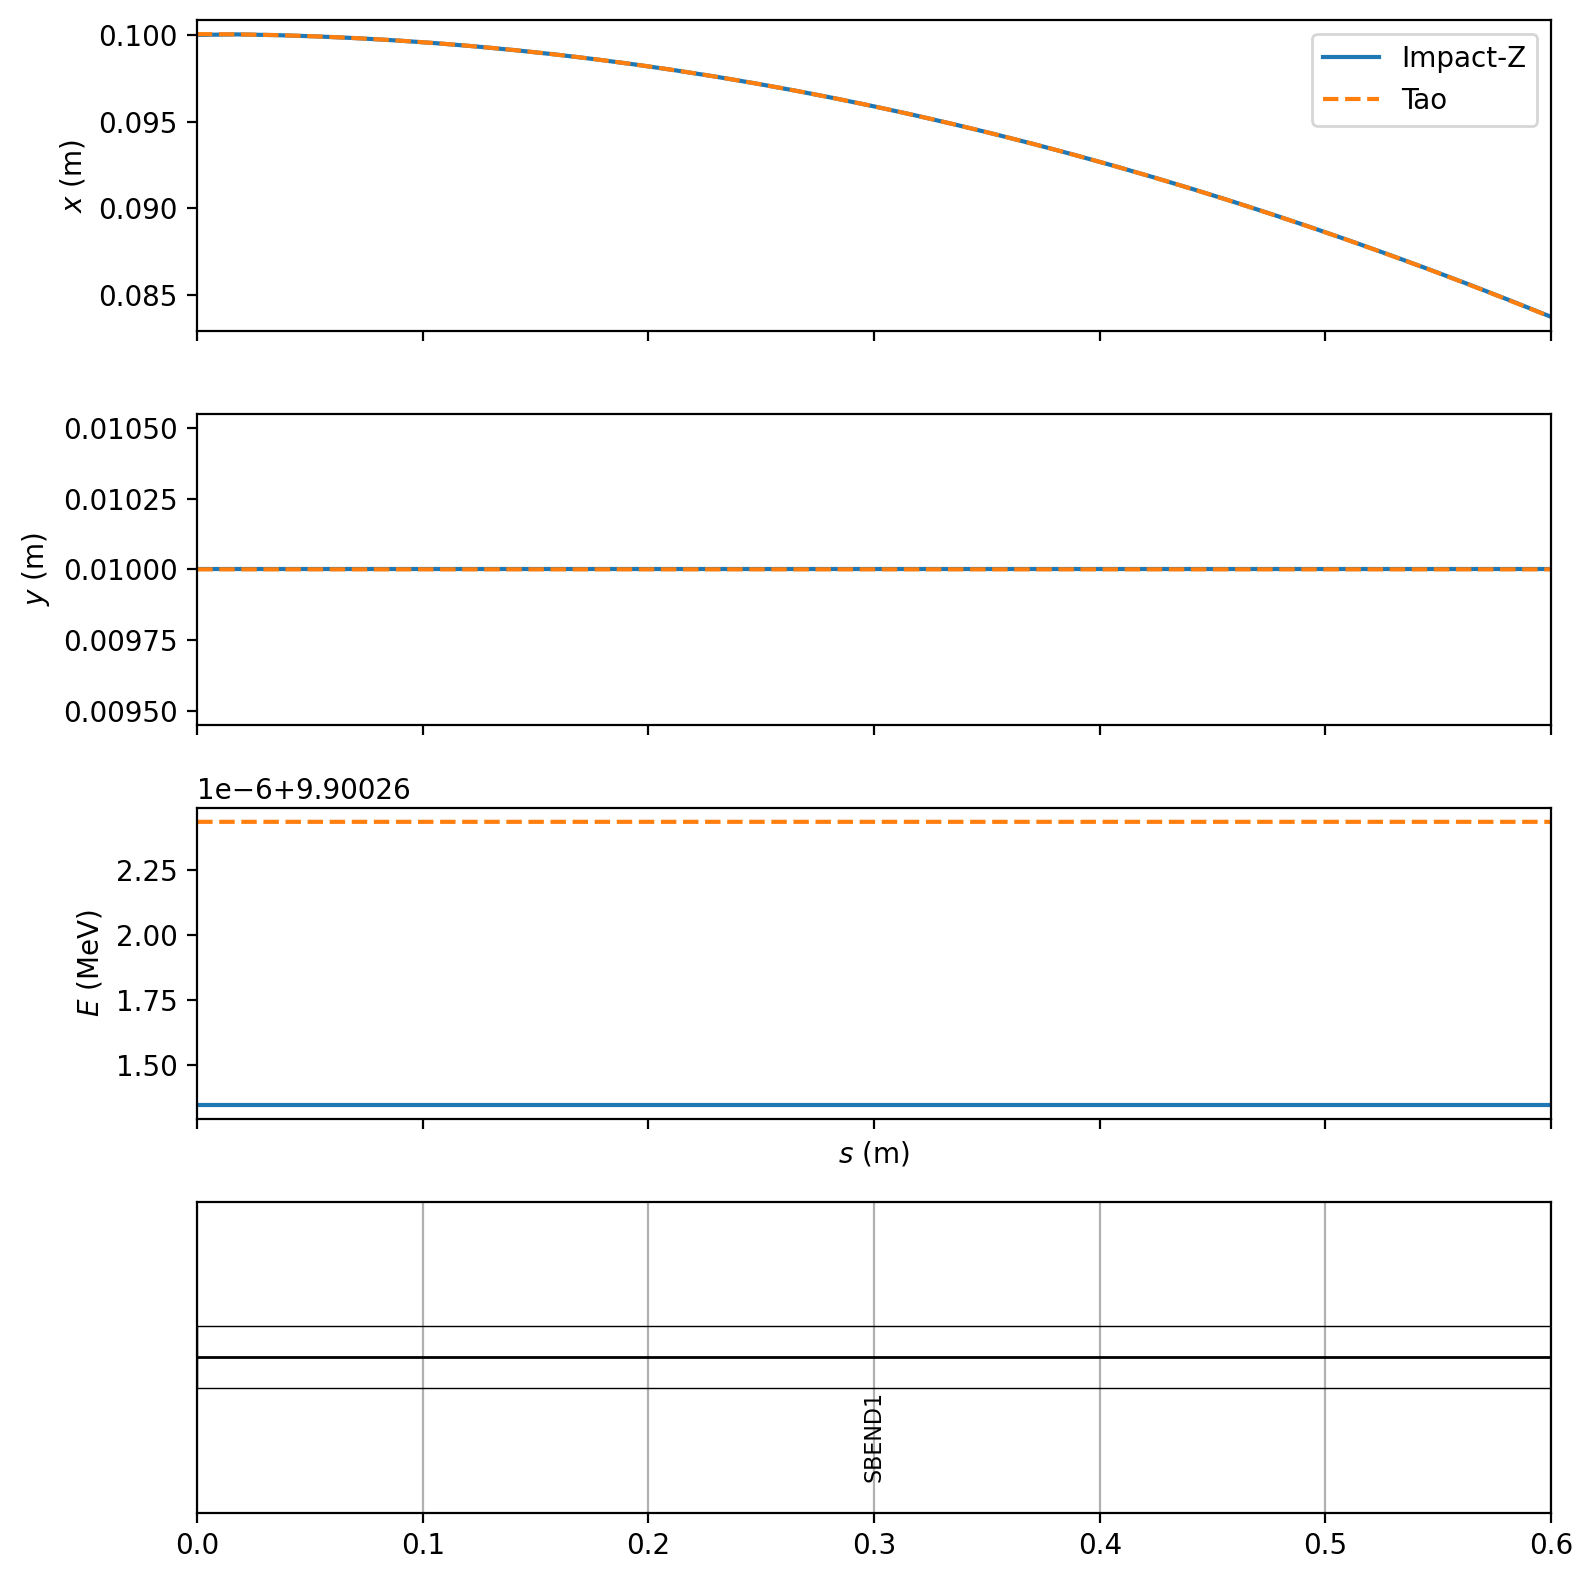

In [13]:
mc2 = I.input.reference_particle_mass
stats = I.output.stats
z = stats.z
x = stats.mean_x
y = stats.mean_y
energy = stats.mean_energy

x_tao = tao.bunch_comb("x")
y_tao = tao.bunch_comb("y")
s_tao = tao.bunch_comb("s")
p_tao = (1 + tao.bunch_comb("pz")) * tao.bunch_comb("p0c")
energy_tao = np.hypot(p_tao, mc2)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(8, 8), sharex=True)
ax1.plot(z, x, label="Impact-Z")
ax1.plot(s_tao, x_tao, "--", label="Tao")
ax1.set_ylabel(r"$x$ (m)")
ax1.legend()

ax2.plot(z, y, label="Impact-Z")
ax2.plot(s_tao, y_tao, "--", label="Tao")
ax2.set_ylabel(r"$y$ (m)")

ax3.plot(z, energy / 1e6, label="Impact-Z")
ax3.plot(s_tao, energy_tao / 1e6, "--", label="Tao")
ax3.set_ylabel(r"$E$ (MeV)")
ax3.set_xlabel(r"$s$ (m)")

tao.update_plot_shapes(type_label="name", layout=True)
tao.matplotlib.plot("lat_layout", axes=[ax4]);